In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Загрузим данные и посмотрим на них.

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#сразу удалим RowNumber - он не информативен для нас
churn_data.drop(columns='RowNumber', axis=1, inplace=True)

#посмотрим общие сведения о данных
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### 1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

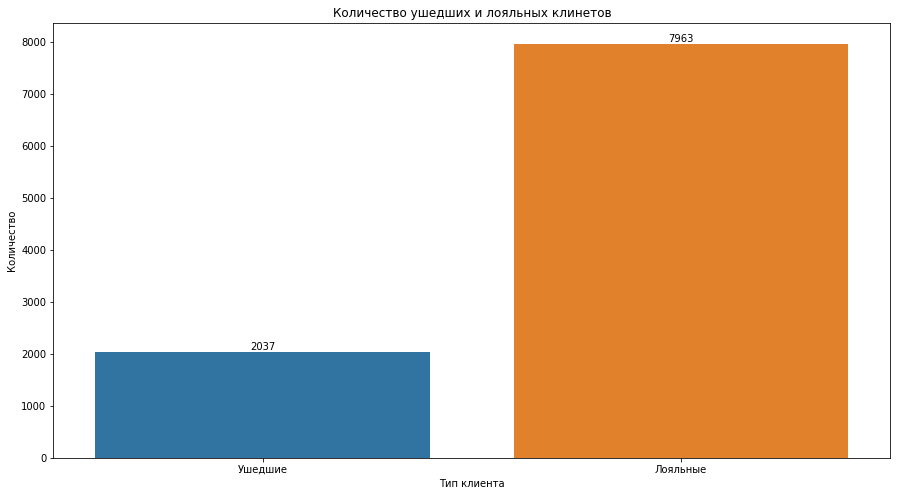

In [25]:
#столбец Exited, где 1 - ушедший клиент, 0 - нет. Добавим столбец Exited_cat с текстовым описанием
#выведем диаграмму подсчета по данному столбцу и посмотрим на отношения
churn_data['Exited_cat'] = churn_data['Exited'].apply(
    lambda x: 'Ушедшие' if x == 1 else 'Лояльные'
    )
fig = plt.figure(figsize=(15, 8))
countplot = sns.countplot(
    data=churn_data,
    x='Exited_cat'
    )
countplot.set_title('Количество ушедших и лояльных клинетов')
countplot.set_xlabel('Тип клиента')
countplot.set_ylabel('Количество')
countplot.bar_label(countplot.containers[0]);

Количесво ушедших клиентов - 20%, для оценки влияния необходимо смотреть параметр Retention Rate за период и делать общий вывод о потоке клиентов. Но в целом показатель оттока необходимо снижать.

### 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

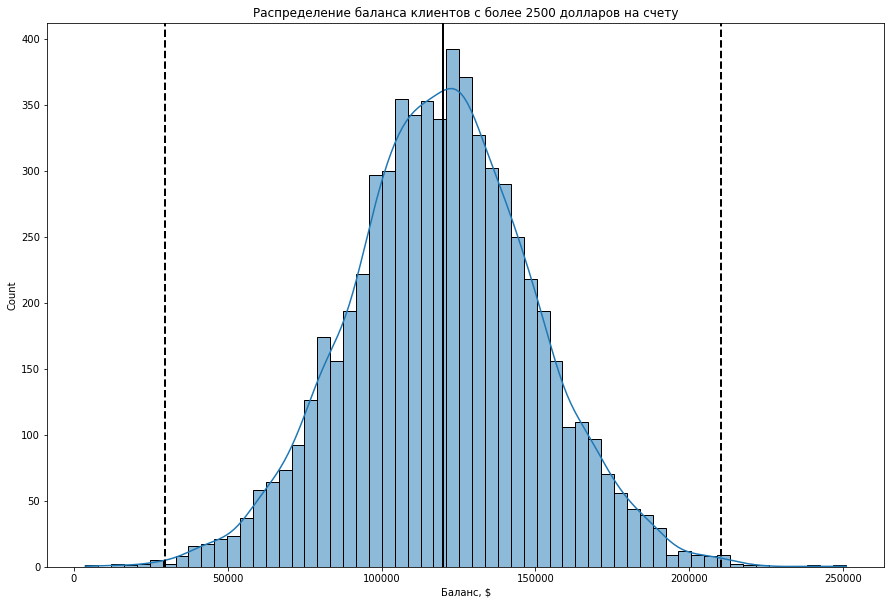

In [65]:
#выберем только клиентов с балансом более 2500 долларов
#построим график распределения
balance_2500 = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(15, 10))
hist = sns.histplot(
    data=balance_2500,
    x='Balance',
    kde=True
)
hist.axvline(balance_2500['Balance'].mean(), color='k', lw=2)
hist.axvline(balance_2500['Balance'].mean()+ 3 * balance_2500['Balance'].std(), color='k', ls='--', lw=2)
hist.axvline(balance_2500['Balance'].mean()- 3 * balance_2500['Balance'].std(), color='k', ls='--', lw=2)
hist.set_title('Распределение баланса клиентов c более 2500 долларов на счету')
hist.set_xlabel('Баланс, $');

Распределение баланса клиентов - нормальное, среднее = 119827, стандартное отклонение = 30095. Основная масса клиентов с балансом около 119 000 долларов. Если включить в выборку счета с балансом до 2500 долларов, распределение не будет столь хорошим.

### 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

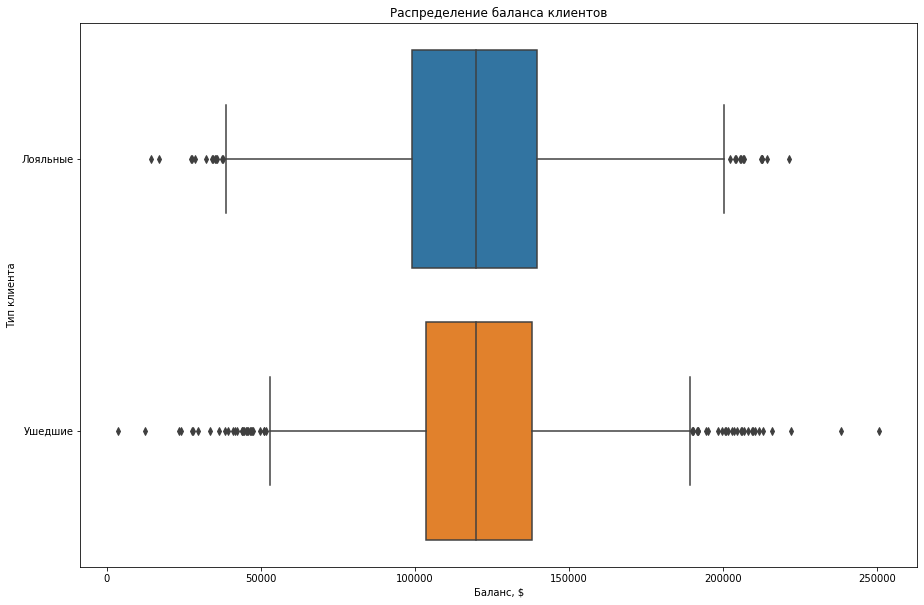

In [68]:
#оставим так же клинетов с балансом более 2500 долларов
#так как большее число ушедших с балансом более 2500
balance_2500 = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(15, 10))
box = sns.boxplot(
    data=balance_2500,
    x='Balance',
    y='Exited_cat'
)
box.set_title('Распределение баланса клиентов')
box.set_xlabel('Баланс, $')
box.set_ylabel('Тип клиента');

Распределение ушедших и лояльных одинаково нормальные, с одной медианой. У ушедших ниже межквартильный размах и менее выражены максимум и миниму, но больше выбросов. Скорее всего клиенты уходять из-за недовольства условиями продукта. Для более обоснованных выводов необходимо изучать продукты банка и конкурентов.

### 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

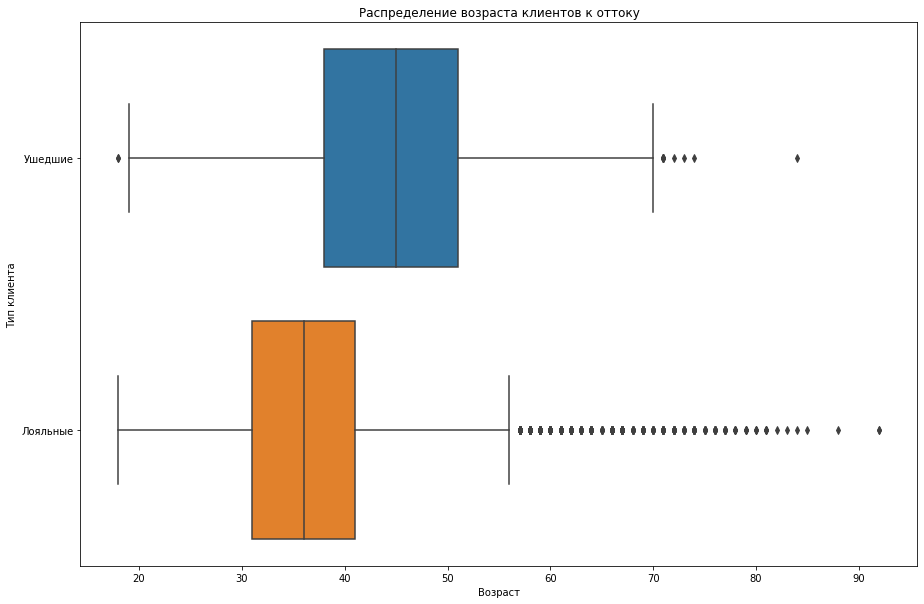

In [71]:
fig = plt.figure(figsize=(15, 10))
box = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited_cat'
)
box.set_title('Распределение возраста клиентов к оттоку')
box.set_xlabel('Возраст')
box.set_ylabel('Тип клиента');

Ушедшие клиенты по возрасту старше лояльных. Медиана лояльных 35 лет, ушедших - 45. Есть единичные выбросы лояльных выше 55 лет. Возможно продукты банка подходять более молодым клиентам. Для возрастных клиентов не хватает, возможно, более консервативных продуктов.

### 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

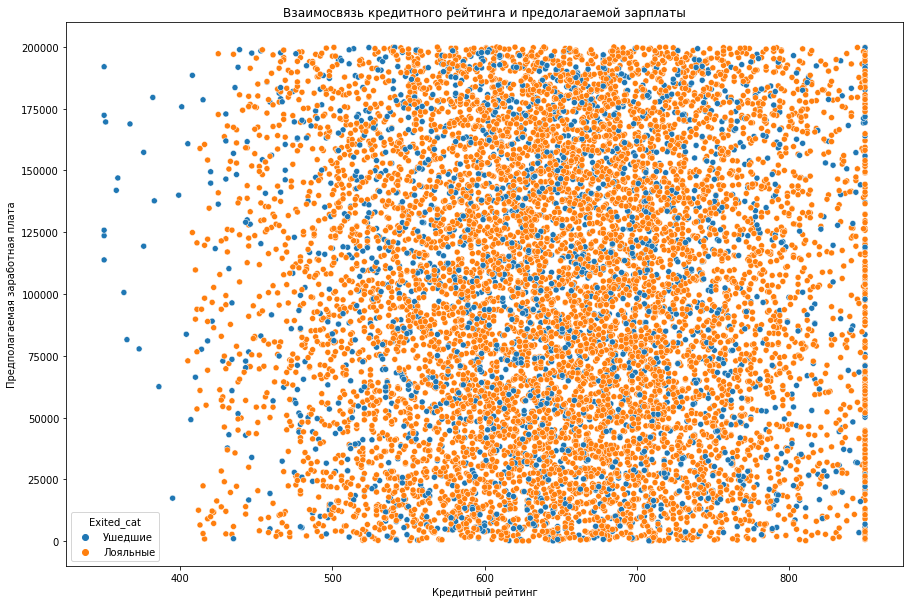

In [74]:
fig = plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited_cat'
)
scatter.set_title('Взаимосвязь кредитного рейтинга и предолагаемой зарплаты')
scatter.set_xlabel('Кредитный рейтинг')
scatter.set_ylabel('Предполагаемая заработная плата');

Явной взаимосвязи признаков нет. Есть некоторое количество ушедших клиентов с низким рейтингом.

### 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0, 0.5, 'Тип клиента')

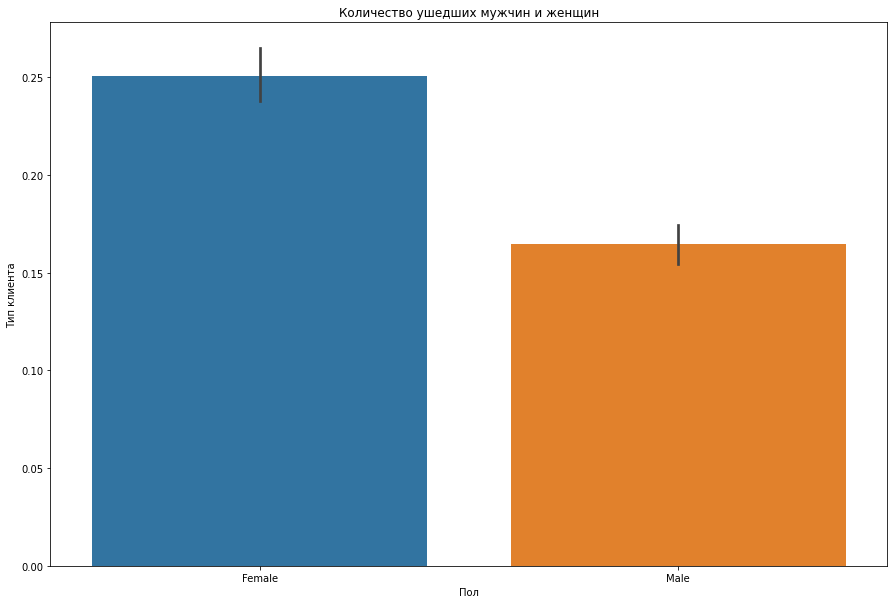

In [82]:
fig = plt.figure(figsize=(15, 10))
bar = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited'
)
bar.set_title('Количество ушедших мужчин и женщин')
bar.set_xlabel('Пол')
bar.set_ylabel('Тип клиента')

Большую долю ушедших стоставляют женщины. Учитывая распределение по возрасту, женщины более старше мужчин.

### 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0, 0.5, 'Отток')

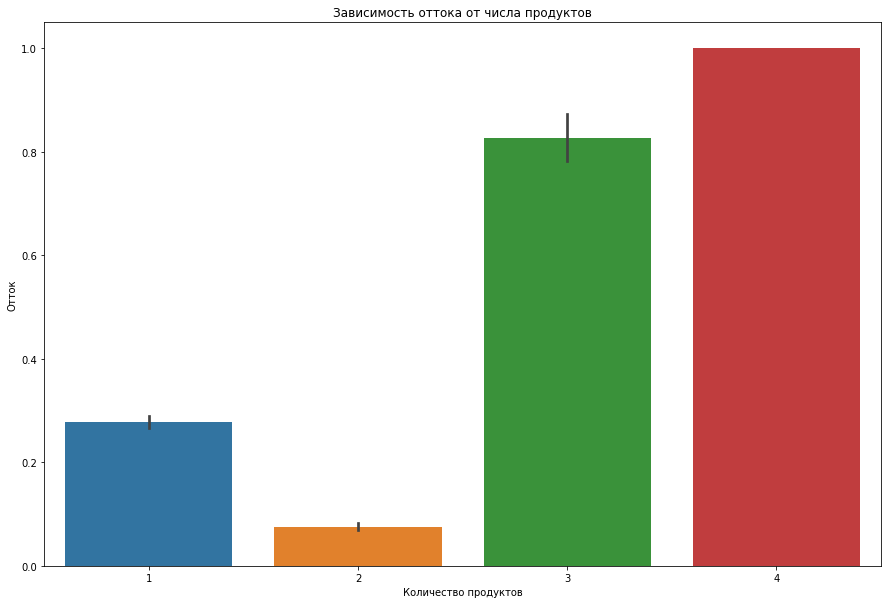

In [114]:
#преобразуем столбец NumOfProducts в категориальный тип
churn_data['NumOfProducts'] = churn_data['NumOfProducts'].astype('category')
fig = plt.figure(figsize=(15, 10))
bar = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited'
)
bar.set_title('Зависимость оттока от числа продуктов')
bar.set_xlabel('Количество продуктов')
bar.set_ylabel('Отток')

Больший процент оттока среди тех, у кого есть 3 и 4 продукта. С чем это может быть связано сложно сказать, обычно при большем числе продуктов лояльность выше, если сравнить клиентов с 1 и 2 продуктами - это хорошо видно. Можно предположить, что число клинетов с продуктами более 2 достаточно мало для хорошей оценки зависимости.

### 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

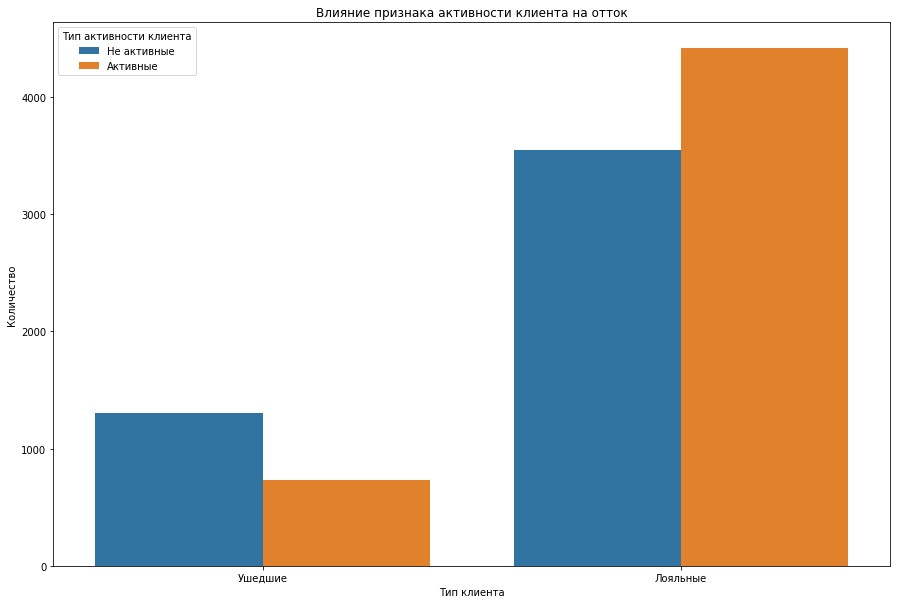

In [132]:
fig = plt.figure(figsize=(15, 10))
countplot = sns.countplot(
    data=churn_data,
    x='Exited_cat',
    hue='IsActiveMember'
)
countplot.set_title('Влияние признака активности клиента на отток')
countplot.set_xlabel('Тип клиента')
countplot.set_ylabel('Количество')
countplot.legend(title='Тип активности клиента', labels=['Не активные', 'Активные'])

Среди ушедших клиентов большее число не активных клиентов. Для активации клиента возможно применять продукты с геймификацией. Если учитывать возраст ушедших (средний 45) - возможно стоит предложить продукты в рамках интересов (автомобили, недвижимость, украшения и т.д.).

### 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [148]:
#группируем по стране по доле ушедших в ней
#и построим карту
geo_data = churn_data.groupby(
    by='Geography',
    as_index=False
)['Exited'].mean()

fig = px.choropleth(
    data_frame=geo_data,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='Доля ушедших клиентов по странам',
    width=700,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

Доля ушедших клинетов больше в Германии - 32%, видимо связано с особенностями менталитета и уровнем состоятельных клиентов в возрасте относительно молодежи.

### 10. Переведите числовой признак CreditScore в категориальный.
Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. 
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(113.09375, 0.5, 'Категория кредитного рейтинга')

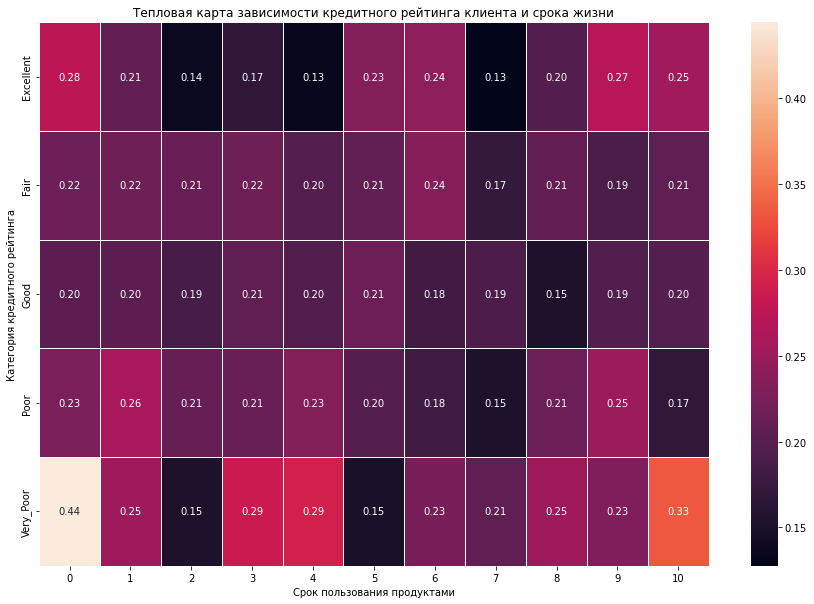

In [157]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(lambda x: get_credit_score_cat(x))

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc=np.mean
)
pivot.columns =  pivot.columns.astype('string')

fig = plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(
    data=pivot,
    annot=True,
    fmt=".2f",
    linewidth=.5
    )
heatmap.set_title('Тепловая карта зависимости кредитного рейтинга клиента и срока жизни')
heatmap.set_xlabel('Срок пользования продуктами')
heatmap.set_ylabel('Категория кредитного рейтинга')

Чаще всего уходят следующие категории клиентов:
1. Категория Very_Poor - 1ый и 10 год обслуживания, довольно сильно уходят 3 и 4 год.
2. Категория Poor - держится довольно стабильно, наиболее выражены 2ой и 9ый год.
3. Категория Excellent - высокий отток в 1ый год и 9 и 10 года.